# Noah Delano Weekly Check-In 10 November 11

### Problem I Am Proud Of

So based on what we learned this week, I wanted to spend some time exploring different orders of Runge-Kutta in order to see how error changes as order increases. So lets start with a simple equation, which I used in my last check-in, but with the Heuns Method, which is

$$y'=\frac{y+x^2-2}{x+1} \hspace{1cm} y(0)=2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#Set up my functions from above
def f(x,y):
    return (y+x**2-2)/(x+1)

#The answer for the above equation, just to compare
def real_answer(x):
    #real answer provided by the professor in order to examine the error
    return x**2+2*x+2-2*(x+1)*np.log(x+1)

In [3]:
#Lets start off with setting up runge-kutta approx. for 3rd Order
#Variables: initial x and y (x(0)=1), max x value, step value, and the real answer 
def rungeKutta2ndOrder(x0,y0,x,h,yreal=None): 
    #Create x values with steps of h
    xvals = np.arange(x0,x+h,h)
    #Create array for y values
    y = [y0] 
    for i in range(1, len(xvals)): 
        #2nd order RK
        k1 = h * f(x0, y0) 
        k2 = h * f(x0 + h, y0 + k1)
        ynew = y0 + (1/2)*(k1 + k2)
        ##add new y value
        y.append(ynew)
        #set next x and y value to insert
        y0 = ynew
        x0 = x0 + h
    
    yvals = np.array(y)
    
    #Plot the real answer
    plt.plot(xvals,yreal, 'k-',label='real')
    #Plot RK approx
    plt.plot(xvals,yvals,'b.',label='2nd Order RK')
    plt.title('2nd Order Runge Kutta Method vs. Real Solution')
    plt.legend()
    plt.grid()
    plt.show()
    
    #Absolute error between approx and real
    error = np.abs(yreal-y)
    #Plot my error as x increases
    plt.plot(xvals,error, 'r')
    plt.title('Error in Runge Kutta method')
    plt.grid()
    plt.show()

    DF = pd.DataFrame({'y' : y, 'error' : error},index=xvals)
    display(DF)
        
    return y,error

In [4]:
#Now lets do 3rd order, which will run similar as 2nd order, but evaluation is more extenuos
def rungeKutta3rdOrder(x0,y0,x,h,yreal=None): 
    #Create x values with steps of h
    xvals = np.arange(x0,x+h,h)
    #Create array for y values
    y = [y0] 
    for i in range(1, len(xvals)): 
        #3rd order RK
        k1 = h * f(x0, y0) 
        k2 = h * f(x0 + (h/2), y0 + (k1/2))
        k3 = h * f(x0 + (3/4)*h, y0 + (3/4)*k2)
        
        ynew = y0 + (1/9)*(2*k1 + 3*k2 + 4*k3)
        y.append(ynew)
        y0 = ynew
        x0 = x0 + h
    
    yvals = np.array(y)
    
    plt.plot(xvals,yreal, 'k-',label='real')
    plt.plot(xvals,yvals,'b.',label='3rd Order RK')
    plt.title('3rd Order Runge Kutta Method vs. Real Solution')
    plt.legend()
    plt.grid()
    plt.show()
    
    error = np.abs(yreal-y)
    plt.plot(xvals,error, 'r')
    plt.title('Error in Runge Kutta method')
    plt.grid()
    plt.show()

    DF = pd.DataFrame({'y' : y, 'error' : error},index=xvals)
    display(DF)
        
    return y,error

In [5]:
#Now lets do 4th order, which will run similar as 2nd order, but evaluation is even more extenuos
def rungeKutta4thOrder(x0,y0,x,h,yreal=None): 
    xvals = np.arange(x0,x+h,h)
    y = [y0] 
    for i in range(1, len(xvals)): 
        k1 = h * f(x0, y0) 
        k2 = h * f(x0 + (1/2)*h, y0 + (1/2)*k1) 
        k3 = h * f(x0 + (1/2)*h, y0 + (1/2)*k2) 
        k4 = h * f(x0 + h, y0 + k3) 
  
        ynew = y0 + (1.0 / 6.0)*(k1 + 2*k2 + 2*k3 + k4)
        y.append(ynew)
        y0 = ynew
        x0 = x0 + h
    
    yvals = np.array(y)
    
    plt.plot(xvals,yreal, 'k-',label='real')
    plt.plot(xvals,yvals,'b.',label='4th Order RK')
    plt.title('4th Order Runge Kutta Method vs. Real Solution')    
    plt.legend()
    plt.grid()
    plt.show()
    
    error = np.abs(yreal-y)
    plt.plot(xvals,error, 'r')
    plt.title('Error in Runge Kutta method')
    plt.grid()
    plt.show()

    DF = pd.DataFrame({'y' : y, 'error' : error},index=xvals)
    display(DF)
        
    return y,error

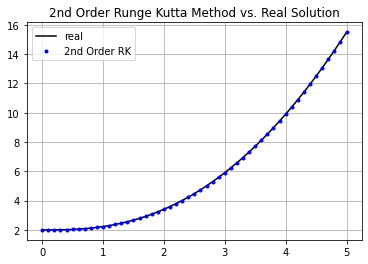

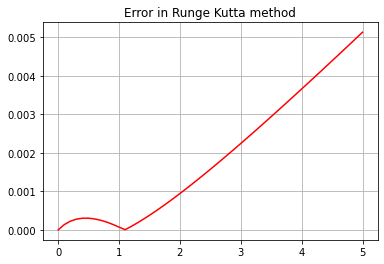

,y,error
0.0,2.000000,0.000000
0.1,2.000455,0.000137
0.2,2.002655,0.000227
0.3,2.008133,0.000280
0.4,2.018181,0.000304
0.5,2.033909,0.000304
0.6,2.056273,0.000285
0.7,2.086114,0.000250
0.8,2.124170,0.000202
0.9,2.171097,0.000142


In [6]:
#Okay, now that all orders of runge-kutta up till 4th are defined, lets run them, where (0,1) is our given point
x0 = 0
y = 2

#Value to stop at
x = 5
#Step value of 0.1
h = 0.1
#Create my x values based on parameters
xvals = np.arange(x0,x+h,h)

#Gets my real x and y values
yreal = real_answer(xvals)
yvals,error = rungeKutta2ndOrder(x0, y, x, h,yreal=yreal)


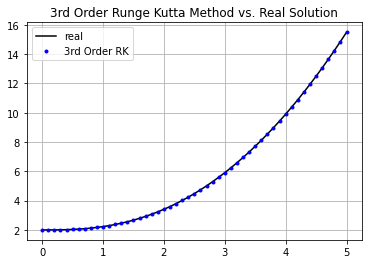

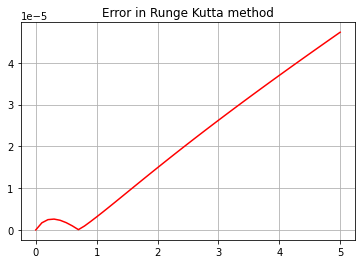

,y,error
0.0,2.000000,0.000000e+00
0.1,2.000319,1.701586e-06
0.2,2.002431,2.457382e-06
0.3,2.007856,2.591004e-06
0.4,2.017880,2.306506e-06
0.5,2.033606,1.736409e-06
0.6,2.055989,9.689307e-07
0.7,2.085864,6.403264e-08
0.8,2.123967,9.368102e-07
0.9,2.170953,2.004485e-06


In [7]:
yvals,error = rungeKutta3rdOrder(x0, y, x, h,yreal=yreal)

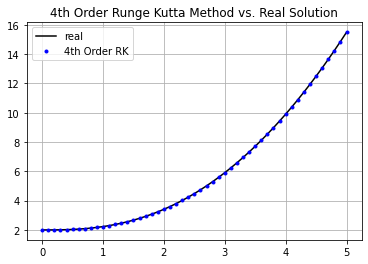

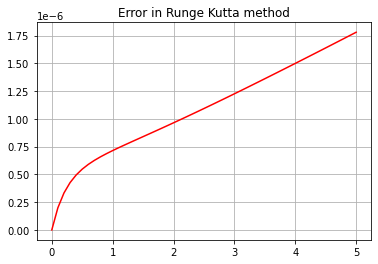

,y,error
0.0,2.000000,0.000000e+00
0.1,2.000318,1.994587e-07
0.2,2.002429,3.327004e-07
0.3,2.007853,4.260177e-07
0.4,2.017878,4.945819e-07
0.5,2.033605,5.474615e-07
0.6,2.055989,5.902395e-07
0.7,2.085865,6.264383e-07
0.8,2.123969,6.583269e-07
0.9,2.170956,6.873917e-07


In [8]:
yvals,error = rungeKutta4thOrder(x0, y, x, h,yreal=yreal)

Based on the above graphs and tables, it appears, as assumed, that as order increases, so does the error with the real answer. In second order, the error is in the the $10^{-3}$ area. 5th order is in the $10^{-5}$ area. And 6th order is in the $10^{-6}$ area. So error values is getting smaller and smaller, which is great. Runge-Kutta is just another nice method that allows for more higher order functions. Ones that have a taylor polynomial that is too complicated. 

### Problem I Struggled With

The problem I struggled with is #11 from section 8.3, mostly because I still get lost with the Richardsons Error. So here is the problem:

$#11)$ Derive

$$Y(x_n)-\tilde{y}_h(x_n)=O(h^2)$$

from

$$Y(x_n)-y_h(x_n)=hD(x_n)+O(h^2), \hspace{1cm} x_0\leq x_n\leq b$$

The first thing we need to figure out is what $\tilde{y}_h(x_n)$ can be, which can be solved through the Richardson's extrapolation formula. So based on the lecture, it appears we need to find the approx. in terms of 1st order rather than second order. So, assuming differentiability of $y$ and $f(x,y)$:

$$y(x_n)-y_h(x_n)=D(x_n)h+O(h^2)$$

Now we need to find the error of h and 2h by subtracting them. So,

$$y(x_n)-y_h(x_n)=D(x_n)h+O(h^2)$$
$$-\left(y(x_n)-y_{2h}(x_n)=D(x_n)2h+O(h^2)\right)$$

We want to get rid of the $D(x_n)$, so we will rewrite the subtraction as:

$$2\left(y(x_n)-y_h(x_n)=D(x_n)h+O(h^2)\right)$$
$$-\left(y(x_n)-y_{2h}(x_n)=D(x_n)2h+O(h^2)\right)$$

Equalling:

$$y(x_n)-2y_h(x_n)+y_{2h}(x_n)=O(h^2)$$

Now to Rearrange:

$$y(x_n)-y_h(x_n)-y_h(x_n)+y_{2h}(x_n)=O(h^2)$$

$$y(x_n)-y_h(x_n)=y_h(x_n)-y_{2h}(x_n)+O(h^2)$$

By Dropping $O(h^2)$, we get the Richardsons extrapolation formula according to the textbook. $y(x_n)$ is the true value we are trying to find. Therefore, when we add $y_h(x_n)$ to both sides, we get

$$y(x_n)=2y_h(x_n)-y_{2h}(x_n)$$

This is where I get abit confused as I am not sure exactly why $y(x_n)\approx\tilde{y}_h(x_n)$. I am guessing since $y(x_n)$ is the real answer, then I guess $\tilde{y}_h(x_n)$ is the approx of that answer, but I could be wrong. I am basing off of what the textbook tells me on page 391. But if this is the case, then

$$\tilde{y}_h(x_n)\approx 2y_h(x_n)-y_{2h}(x_n)$$

Since we have a $y_{h}(x_n)$ within our richardsons, we can isolate it and see if this is a good substitute that incorporates $\tilde{y}_h(x_n)$. So,

$$\tilde{y}_h(x_n)\approx 2y_h(x_n)-y_{2h}(x_n)$$

$$\tilde{y}_h(x_n)+y_{2h}(x_n)\approx 2y_h(x_n)$$

$$y_h(x_n)\approx\frac{\tilde{y}_h(x_n)+y_{2h}(x_n)}{2}$$

Now lets substitute this formula from the base equation in the question. So:

$$y(x_n)-y_h(x_n)=hD(x_n)+O(h^2)$$

$$y(x_n)-\left[\frac{\tilde{y}_h(x_n)+y_{2h}(x_n)}{2}\right]=hD(x_n)+O(h^2)$$

$$2y(x_n)-\left[\tilde{y}_h(x_n)+y_{2h}(x_n)\right]=2hD(x_n)+2O(h^2)$$

$$2y(x_n)-\tilde{y}_h(x_n)-y_{2h}(x_n)=2hD(x_n)+2O(h^2)$$

Now we have this monstrosity. So, I would assume the next step is the get rid of our $y_{2h}(x_n)$ as the equation we are deriving doesn't use it. Now based on one of the formulas we subtracted above, we can see that 

$$y(x_n)-y_{2h}(x_n)=D(x_n)2h+O(h^2)$$

So I will just solve for $y_{2h}(x_n)$:

$$y(x_n)-y_{2h}(x_n)=D(x_n)2h+O(h^2)$$

$$y_{2h}(x_n)=-D(x_n)2h-O(h^2)+y(x_n)$$

Lets Substitute:

$$2y(x_n)-\tilde{y}_h(x_n)-y_{2h}(x_n)=2hD(x_n)+2O(h^2)$$

$$2y(x_n)-\tilde{y}_h(x_n)+D(x_n)2h+O(h^2)-y(x_n)=2hD(x_n)+2O(h^2)$$

$$y(x_n)-\tilde{y}_h(x_n)=O(h^2)$$


Honestly Have no idea how this worked. I just tried incorporating elements that weren't present, but still have no idea hos richardsons works.

### How I Contributed To My Group

So this week, I was luckily able to attend all the sessions for a change.On Friday, it was kind of uneventful, besides Kimberley working on perfecting her code for the Runge-Kutta methods. But she was eventually able to figure it out on her own. Besides casual talks just about the notes, there wasn't much talking this time around. On monday, I did my best in keeping active as I was trying to catch a train. All of us had some issues as some of the notes or code wasn't really making sense. So when we got in touch with Joanna, we noticed things like the lagrangrange first order polynomial was wrong as it was using $x_{n+1}$ when it should be using $x_n$ and $x_{n-1}$. Plus, I asked Joanna generally what the purpose of the past few weeks were, which is just about approximation in general and seeing the advantages and disadvantages of each method. Since this is our last session in this realm of Numerical Analysis, it was nice to note the general idea of what we have been learning.

### Goals For Next Week

Honestly, my goal before we start going into new content is making sure I fully understand everything from this week, mostly in the explicity multi-step methods. Richardsons error is still kind of a blur to me, so I will see if I can spend some time with Joanna going over it in more detail.There is alot of crazy math involved and I want to be able to explain it, but honestly I was just bs ing my way through, which is no way to do math. Therefore, my goal is to further understand richardsons before getting into the new content.